# Demo hotelling

Illustrate the Hotelling Transform

## Image creation

A binary image with an ellipse

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.linalg as LA
import sys,os
ia898path = '../../'
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [2]:
def gaussian(s, mu, cov):
    d = len(s)  # dimension
    n = np.prod(s) # n. of samples (pixels)
    x = np.indices(s).reshape( (d, n))
    xc = x - mu 
    k = 1. * xc * np.dot(np.linalg.inv(cov), xc)
    k = np.sum(k,axis=0) #the sum is only applied to the rows
    g = (1./((2 * np.pi)**(d/2.) * np.sqrt(np.linalg.det(cov)))) * np.exp(-1./2 * k)
    return g.reshape(s)

""
Ellipse

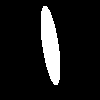

In [3]:
f = gaussian((100,100), np.array([[45,50]]).T, [[40*40,15*15],[15*15,10*10]])
f = f > (f.max() * np.exp(-1./2))
ia.adshow(f, title='Ellipse')     

## Feature vector

The coordinates of each 1 pixel are the features: cols and rows coordinates. 

In [4]:
X = np.nonzero(f)
X = np.array(X).T
n,m = X.shape
print('Number of samples (n):', n)
print('Number of attributes (m):', m)
print('X=\n', end=' ')
print(X)

Number of samples (n): 1023
Number of attributes (m): 2
X=
 [[ 6 43]
 [ 6 44]
 [ 6 45]
 ..., 
 [84 55]
 [84 56]
 [84 57]]


## Mean vector

The mean value is the centroid.

$$   \overline{X} = \frac{1}{n} [ \sum_{i = 0}^{n-1} X_{i1}   \sum_{i = 0}^{n-1} X_{i2}   \cdots  
   \sum_{i = 0}^{n-1} X_{im} ]
$$

In [5]:
mu = X.mean(axis=0)
print('Centroid = ',mu)

Centroid =  [ 45.  50.]


## Computing the covariance matrix

The covariance matrix is given by:

$$
   \Sigma = \frac{1}{n-1}(X - \overline{X})^T(X - \overline{X})
$$

It can be computed by the numpy function cov or directly from the equation:

In [6]:
C = np.cov(X-mu, rowvar=False)
C1 = ((X-mu).T).dot(X-mu)/(n-1)
print('Covariance matrix computed usint np.cov\n',C.round(2))
print('Covariance matrix computed from the definition\n',C1.round(2))

Covariance matrix computed usint np.cov
 [[ 397.65   54.22]
 [  54.22   24.09]]
Covariance matrix computed from the definition
 [[ 397.65   54.22]
 [  54.22   24.09]]


## Computing eigenvalues and eigenvectors

The eigenvalues and eigenvectors are computed from the covariance matrix. 
The eigenvalues are sorted in decrescent order

In [7]:
[e,V] = LA.eigh(C)
print('e:',e.round(2))
print('V:\n',V.round(2))
index = np.argsort(e)[::-1]
V = V[:,index]
e = e[index]
print('\nEigenvalues vector\n')
print(e.round(2))
print('\nEigenvectors matrix\n')
print(V.round(2))
print('\nInverse is transpose\n', end=' ')
print(LA.inv(V).round(2))

e: [  16.38  405.36]
V:
 [[ 0.14 -0.99]
 [-0.99 -0.14]]

Eigenvalues vector

[ 405.36   16.38]

Eigenvectors matrix

[[-0.99  0.14]
 [-0.14 -0.99]]

Inverse is transpose
 [[-0.99 -0.14]
 [ 0.14 -0.99]]


## Measure the angle of inclination

The direction of the eigenvector of the largest eigenvalue gives the inclination of the elongated figure

In [8]:
theta = np.arctan(V[0,0]/V[1,0])*180./np.pi
print('The inclination angle is', theta.round(3),' degrees')

The inclination angle is 81.906  degrees


## Plot the eigenvectors and centroid

The eigenvectors are placed at the centroid and scaled by the square root of its correspondent eigenvalue

""
Ellipse

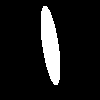

In [9]:
ia.adshow(f, title='Ellipse')

## Compute the Hotelling transform

The Hotelling transform, also called Karhunen-Loeve (K-L) transform, or the method of principal components, is computed below

In [17]:
Xnew = (X-mu).dot(V)
Xnew_mu = Xnew.mean(axis=0)
print('Mean value of the transform\n')
print(Xnew_mu.round(2))
C_Xnew = np.cov(Xnew,rowvar=False)
print('\nCovariance matrix of the transform\n')
print(C_Xnew.round(2))
C_Xnew = np.where(C_Xnew <1e-10, 0, C_Xnew)
print('\nStandard deviation matrix of the transformed data\n')
print(np.sqrt(C_Xnew).round(2))

Mean value of the transform

[ 0. -0.]

Covariance matrix of the transform

[[ 405.36    0.  ]
 [   0.     16.38]]

Standard deviation matrix of the transformed data

[[ 20.13   0.  ]
 [  0.     4.05]]


## Display the transformed data

The centroid of the transformed data is zero (0,0). To visualize it as an image, the features are 
translated by the centroid of the original data, so that only the rotation effect of the Hotelling 
transform is visualized.

The black dots in the transformed image is due to the direct geometric transform.

""
Ellipse w/ straightened axes

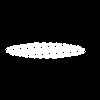

In [18]:
Xnew = np.rint(Xnew + mu).astype(int)
g = np.zeros(f.shape, np.bool)
g[Xnew[:,1],Xnew[:,0]] = True
ia.adshow(g, title='Ellipse w/ straightened axes')

## Reconstruction

""
Ellipse reconstructed

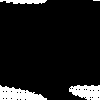

In [14]:
Y = (mu + Xnew.dot(V.T)).astype(np.int)
gy = np.zeros(f.shape, np.bool)
gy[Y[:,1],Y[:,0]] = True
ia.adshow(gy, title='Ellipse reconstructed')

## Image read and display

The RGB color image is read and displayed

""
Original RGB image

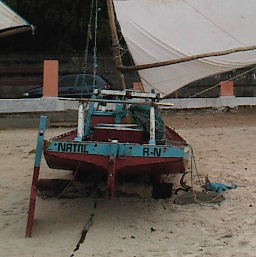

In [31]:
f = mpimg.imread('../data/boat.tif')
ia.adshow(f,title='Original RGB image')

In [32]:
print(f.shape)

(257, 256, 3)


## Extracting and display RGB components

The color components are stored in the third dimension of the image array

""
Red component
""
Green component
""
Blue component

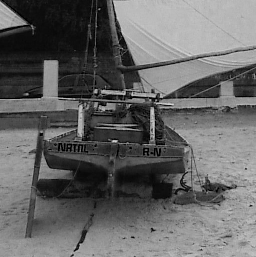
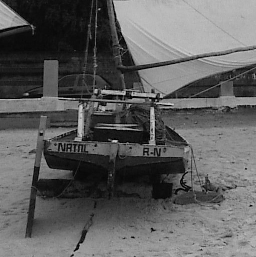
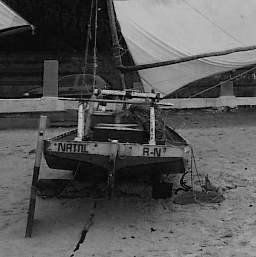

In [34]:
nb = ia.nbshow(3)
r = f[:,:,0]
g = f[:,:,1]
b = f[:,:,2]
nb.nbshow(r,title='Red component')
nb.nbshow(g,title='Green component')
nb.nbshow(b,title='Blue component')
nb.nbshow()

## Feature vector: R, G and B values

The features are the red, green and blue components. The mean vector is the average color in the image. The eigenvalues and eigenvectors are computed. The dimension of the covariance matrix is 3x3 as there are 3 features in use

In [36]:
def pca(X):
    '''
    features are in the columns
    samples are in the rows
    '''
    n, dim = X.shape
    mu = X.mean(axis=0)
    Xc = X - mu                    # 0 mean

    C = (Xc.T).dot(Xc)/(n-1)        # Covariance matrix
    e,V = np.linalg.eigh(C)       # eigenvalues and eigenvectors of the covariance matrix        
    indexes = np.argsort(e)[::-1] # sorting eigenvalues from largest  
    e  = e [indexes]              # update e and V
    V = V[:,indexes]
    return V,e,mu     

In [38]:
X = np.array([r.ravel(),g.ravel(),b.ravel()]).T
print(X.shape)
print(X[:5,:])
V,e,mu = pca(X)
print('Mean value of each channel (R,G,B)\n')
print(mu.round(2))
Cx = np.cov(X,rowvar=False)
print('\nCovariance matrix\n')
print(Cx.round(2))
print('\nEigenvalues matrix\n')
print(e.round(2))
print('\nEigenvectors matrix\n')
print(V.round(2))

(65792, 3)
[[59 93 92]
 [42 74 71]
 [ 0 24 20]
 [11 28 20]
 [29 41 31]]
Mean value of each channel (R,G,B)

[ 101.27   94.92   87.41]

Covariance matrix

[[ 3497.95  3273.2   3086.74]
 [ 3273.2   3239.67  3103.11]
 [ 3086.74  3103.11  3032.4 ]]

Eigenvalues matrix

[ 9572.67   180.23    17.12]

Eigenvectors matrix

[[-0.6  -0.77  0.24]
 [-0.58  0.21 -0.79]
 [-0.56  0.61  0.57]]


## Hotelling transform

The K-L transform is computed. The mean vector is zero and the covariance matrix is decorrelated. We can see the values of the standard deviation of the first, second and third components

In [40]:
y = (X-mu).dot(V)
print('5 primeiras amostras\n',y[:5,:])
my = np.mean(y,axis=0)
print('Mean value of the transform\n')
print(my.round(3))
Cy = np.cov(y,rowvar=False)
print('\nCovariance matrix of the transform\n')
print(Cy.round(2))
Cy = np.where(Cy <1e-10, 0, Cy)
print('\nStandard deviation matrix of the transformed data\n')
print(np.sqrt(Cy).round(2))

5 primeiras amostras
 [[  23.718303     34.84113792   -5.90073476]
 [  56.53645303   31.23761526   -6.89252764]
 [ 138.90031686   22.23866561   -6.43118211]
 [ 130.03321235   14.61776326   -6.97552126]
 [ 105.66175321   10.15045419   -6.70142494]]
Mean value of the transform

[ 0.  0. -0.]

Covariance matrix of the transform

[[ 9572.67     0.      -0.  ]
 [    0.     180.23    -0.  ]
 [   -0.      -0.      17.12]]

Standard deviation matrix of the transformed data

[[ 97.84   0.     0.  ]
 [  0.    13.42   0.  ]
 [  0.     0.     4.14]]


## Displaying each component of the transformed image

The transformed features are put back in three different images with the g1 with the first component (larger variance) and g3 with the smaller variance

""
Variance:9572.669654
""
Variance:180.229077
""
Variance:17.119634

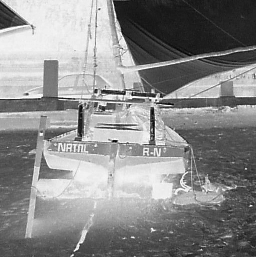
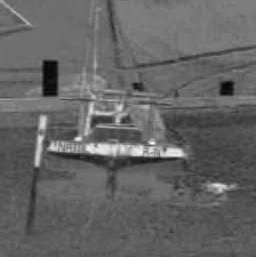
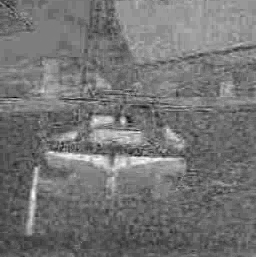

In [42]:
g1 = y[:,0].reshape(r.shape)
g2 = y[:,1].reshape(r.shape)
g3 = y[:,2].reshape(r.shape)
nb.nbshow(ia.normalize(g1),title='Variance:%f' % (Cy[0,0],))
nb.nbshow(ia.normalize(g2),title='Variance:%f' % (Cy[1,1],))
nb.nbshow(ia.normalize(g3),title='Variance:%f' % (Cy[2,2],))
nb.nbshow()

## Full reconstruction

One can reconstruct the image by multiplying the transformed image by the transpose of eigenvector matrix  
and adding the mean value of the image.

$$ \begin{matrix}
   Y &=& (X - \bar{X}) V \\
   X &=& \bar{X} + Y V^{T}
   \end{matrix}
   $$
   

Mean square error =  0.37
Max square error =  1


""
original
""
Recomposed image

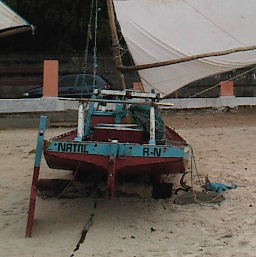
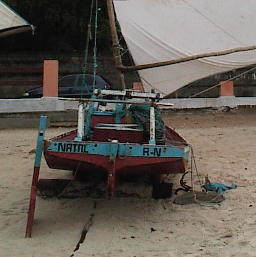

In [45]:
y1=y.copy()
X1 = y1.dot(V.T) + mu
f1=np.zeros_like(f)            
for i in range(3):
    f1[:,:,i] = np.reshape(X1[:,i],r.shape)
print('Mean square error = ',np.mean((f1-f)**2).round(2))
print('Max square error = ',np.max((f1-f)**2).round(2))
nb.nbshow(f,title='original')
nb.nbshow(f1,title='Recomposed image')
nb.nbshow()

## Partial reconstruction

The component corresponding to the smallest variance is erased from the transformed image.
It is noticeable that the mean square error is the smallest eigenvalue.

Mean square error =  482.37
Max square error =  7921.0


""
original
""
Recomposed image
""
normalized absolute error

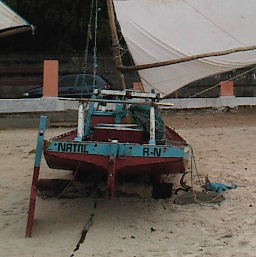
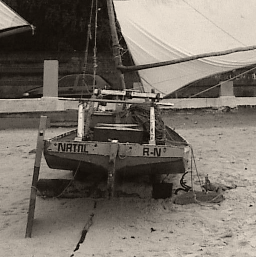
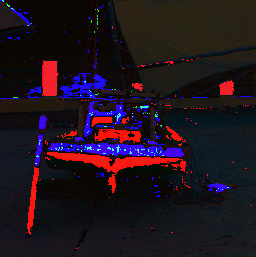

In [48]:
y1=y.copy()
y1[:,2]=0
y1[:,1]=0
X1 = y1.dot(V.T) + mu
X1n = ia.normalize(X1).astype('uint8')
f1=np.zeros_like(f)            
for i in range(3):
    f1[:,:,i]=np.reshape(X1n[:,i],r.shape)
print('Mean square error = ',np.mean((1.*f1-f)**2).round(2))
print('Max square error = ',np.max((1.*f1-f)**2).round(2))
nb.nbshow(f,title='original')
nb.nbshow(f1,title='Recomposed image')
nb.nbshow(ia.normalize(np.abs(1*f1-f)),'normalized absolute error')
nb.nbshow()

In [52]:
print(f1.shape)
m = f1.mean(axis=0).mean(0)
print(m)

(257, 256, 3)
[ 120.74189871  113.41017145  104.74896644]


## References

- `http://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem Karhunen Loeve Transform` - Wikipedia
- `http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/ Computer Vision for Dummies`: Geometric
   interpretation of the covariance matrix

## See Also

- `iapca` - Principal Component Analysis
- `iagaussian` - Gaussian image